# Analysis synthetic dataset

Authors:
- Joana Simões, n.º 2019217013
- Tomás Ferreira, n.º 2019224786

Este notebook contém a análise feita com o dataset gerado atraves do SDV com o melhor modelo, o CopulaGAN. Para comparar a análise com a análise dos dados originais, recomenda-se que se visualize este notebook lado a lado com o notebook "analysis_original.ipynb".

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [35]:
data_path = os.path.join('dataset', 'synthetic_data_CopulaGAN.csv')

In [36]:
# load dataset
data = pd.read_csv(data_path, low_memory=False)

In [37]:
# remove rows with missing values
data = data.dropna()

## Analyse past columns

In [38]:
past_selected_columns = ['infringed']
for column in data.columns:
    if column.startswith('past'):
        past_selected_columns.append(column)

In [39]:
past_data = data[past_selected_columns]

### Correlation between past credit application and infringement

In [40]:
past_correlation_all = past_data.corr()

Text(0.5, 1.0, 'Correlation between past credit applications info and infringements')

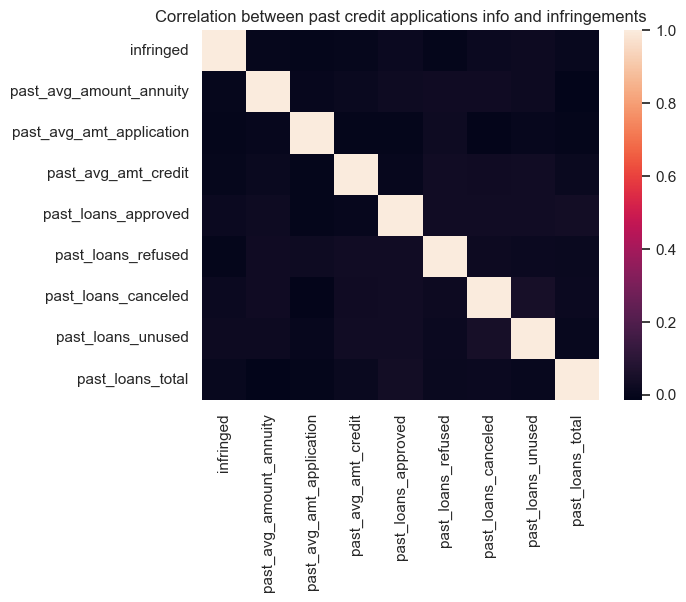

In [41]:
plt.figure()
sns.heatmap(past_correlation_all,
    xticklabels=past_correlation_all.columns,
    yticklabels=past_correlation_all.columns,
)
plt.title('Correlation between past credit applications info and infringements')

Comparando com os resultados obtidos utilizando o dataset original, pode-se observar que existiu muita perda de informação. Antes, existiam muita correlação entre algumas features, que agora desapareceram. 

In [42]:
past_amt = []
for col in past_selected_columns:
    if col.startswith('past_avg'):
        past_amt.append(col)

In [43]:
past_amt_mean_infringed = pd.DataFrame(data[data.infringed == True][past_amt].mean())
past_amt_mean_not_infringed = pd.DataFrame(data[data.infringed == False][past_amt].mean())

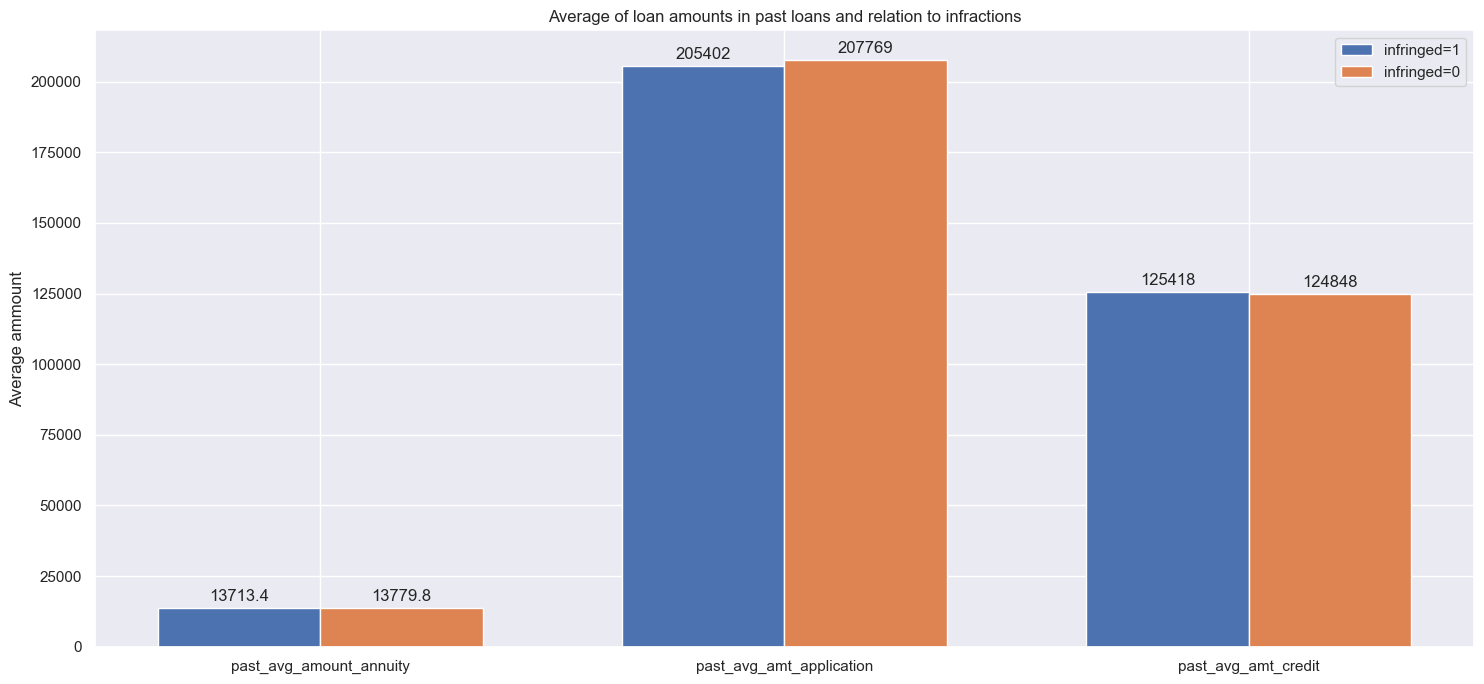

In [44]:
x = np.arange(len(past_amt_mean_infringed.index))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, past_amt_mean_infringed[0], width, label='infringed=1')
rects2 = ax.bar(x + width/2, past_amt_mean_not_infringed[0], width, label='infringed=0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average ammount')
ax.set_title('Average of loan amounts in past loans and relation to infractions')
ax.set_xticks(x, labels=list(past_amt_mean_infringed.index))
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

Ao comparar o average amount, observa-se que as percentagens mudaram. No dataset original, a feature que aparecia com maior valor era o *past_avg_amt_credit* e neste novo dataset é o *past_avg_amt_application*.

In [45]:
past_loans = []
for col in past_selected_columns:
    if col.startswith('past_loans'):
        past_loans.append(col)

In [46]:
past_loans_mean_infringed = pd.DataFrame(data[data.infringed == True][past_loans].mean())
past_loans_mean_not_infringed = pd.DataFrame(data[data.infringed == False][past_loans].mean())

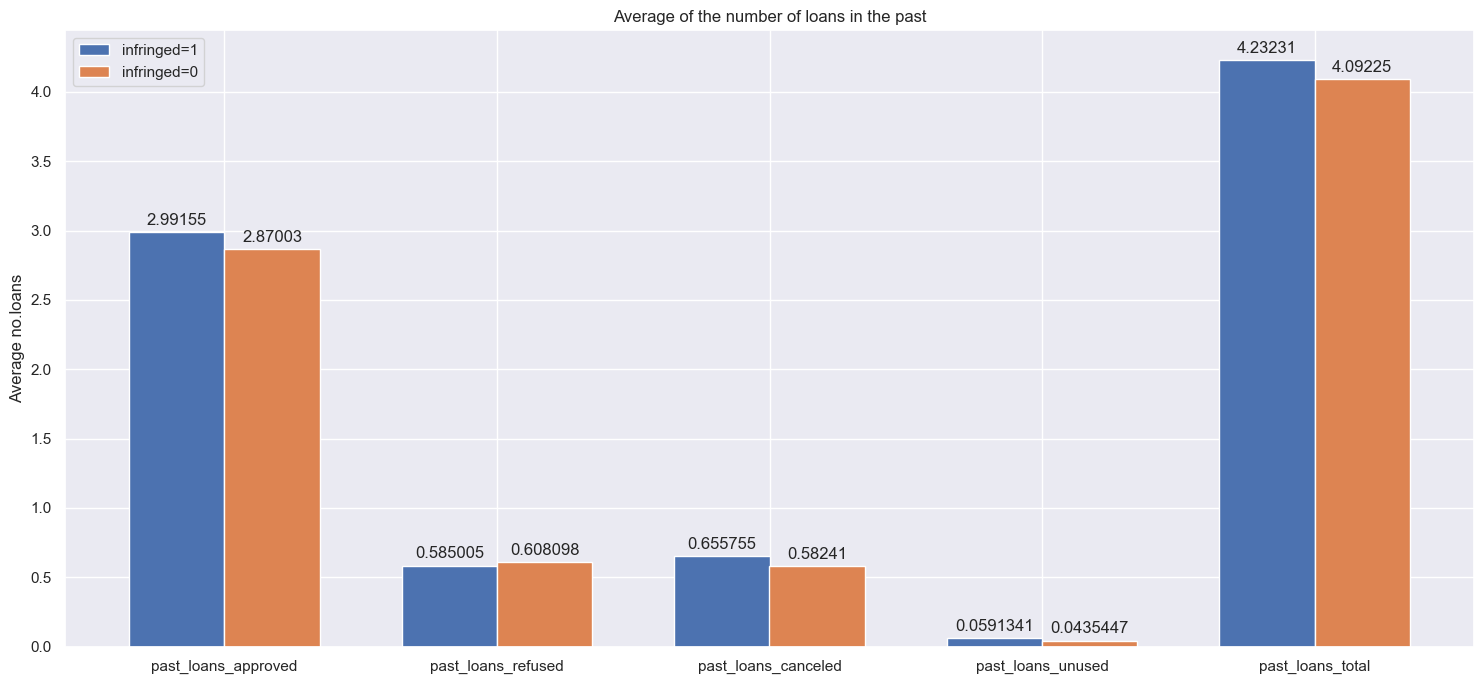

In [47]:
x = np.arange(len(past_loans_mean_infringed.index))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, past_loans_mean_infringed[0], width, label='infringed=1')
rects2 = ax.bar(x + width/2, past_loans_mean_not_infringed[0], width, label='infringed=0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average no.loans')
ax.set_title('Average of the number of loans in the past')
ax.set_xticks(x, labels=list(past_loans_mean_infringed.index))
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

Observanfo agora o número de loans, verifaca-se que as percentagens se mantiveram semelhantes às do dataset original. As discrepancias que existem pode-se dever ao facto de só ter sitdo utilizada uma amostra do dataset original para treinar o modelo de geração de dados sintéticos.

In [48]:
diffs = past_loans_mean_not_infringed - past_loans_mean_infringed

In [49]:
diffs.index[np.argmax(np.abs(diffs[0]))]

'past_loans_total'

## Analyse personas

Text(0.5, 1.0, 'Histogram with the distribution of ages of people')

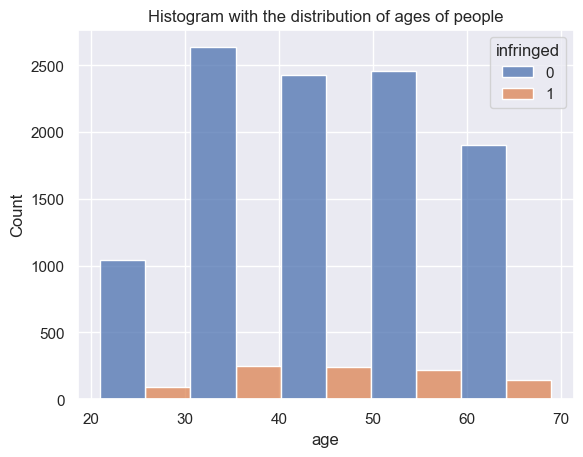

In [50]:
plt.figure()
sns.set()
sns.histplot(data=data, x='age', hue='infringed', multiple="dodge", bins=5)
plt.title('Histogram with the distribution of ages of people')

Pode-se observar que as distribuições alteraram-se bastante com o novo dataset sintético. Nos dados originais,  existiam poucas pessoas com mais de 60 anos a pedir empréstimos, neste dataset essa percentagem aumentou consideravelmente, ficando acima das idades 20-30, que ainda tinham a 3ªa maior percentagem. 

Text(0.5, 1.0, 'Histogram with the distribution of annual income of people')

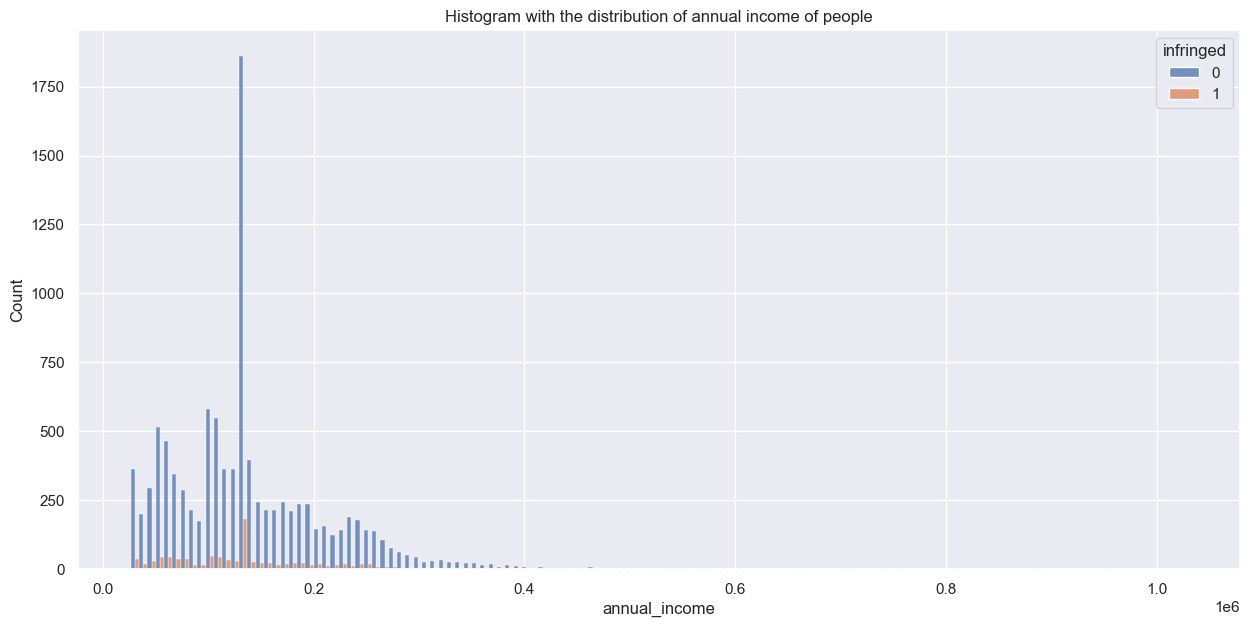

In [56]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='annual_income', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of annual income of people')

Text(0.5, 1.0, 'Histogram with the distribution of credit annuity of people')

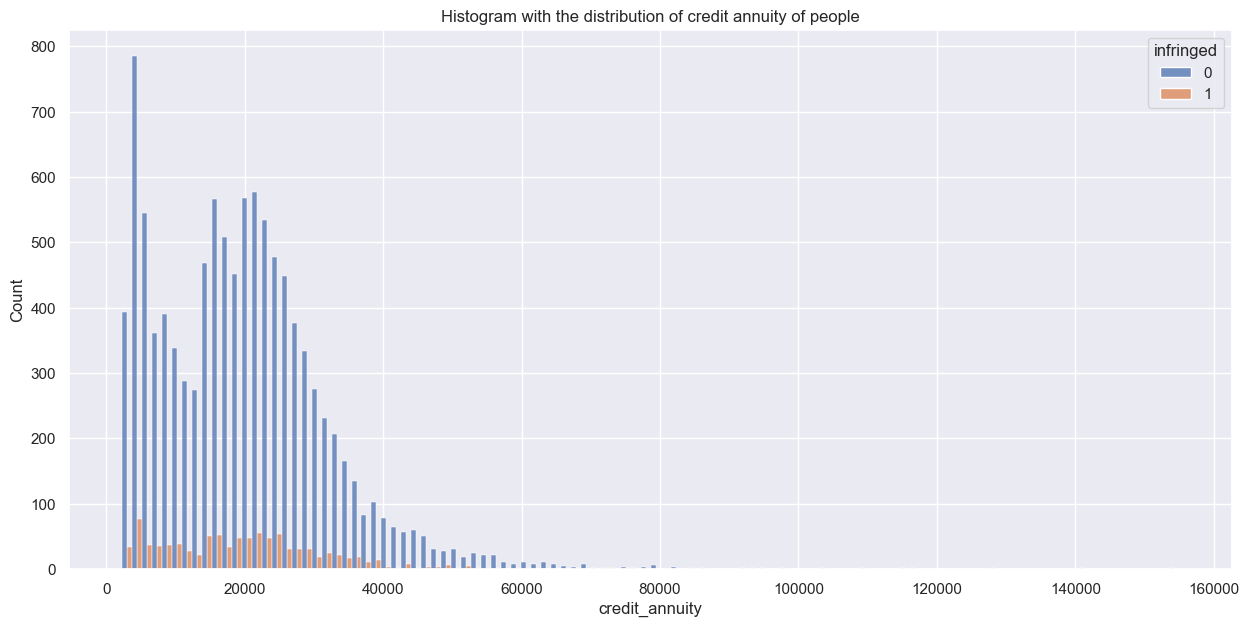

In [57]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='credit_annuity', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of credit annuity of people')

Text(0.5, 1.0, 'Histogram with the distribution of gender of people')

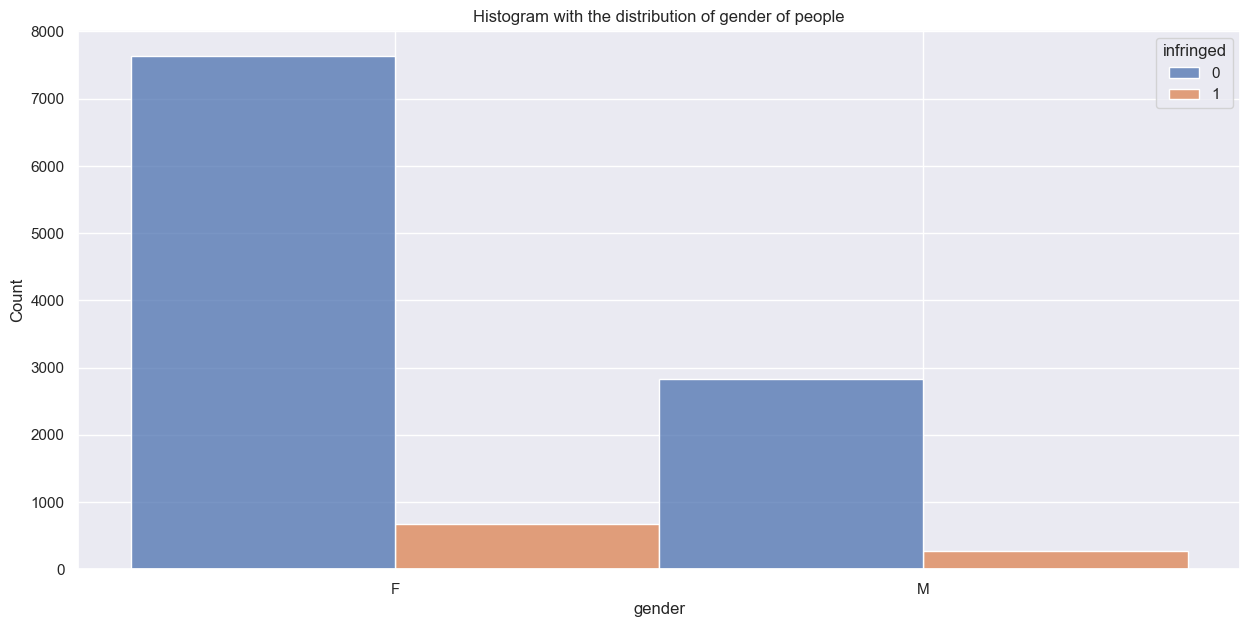

In [51]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='gender', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of gender of people')

Comparando os géneros das pessoas, verifica-se mais uma vez que existiram várias alterações das distribuições com os dados sintéticos. Nos dados originais, era possível observar que pedia mais empréstimos e competia mais infrações eram os homens. Agora, no novo dataset, essa percentagem diminui bastante ficando muito abaixo da das mulheres. 

Text(0.5, 1.0, 'Histogram with the distribution of income type of people')

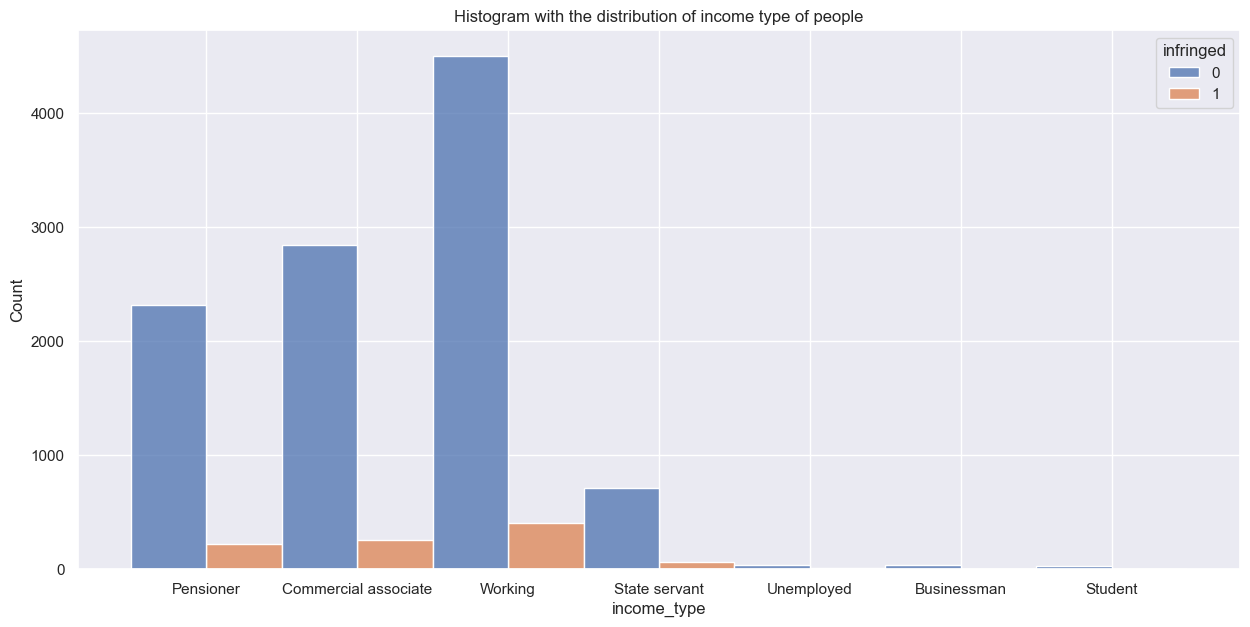

In [52]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='income_type', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of income type of people')

Ao comparar as diferentes distribuições, observa-se que aparecem novas classes que não apareciam no dataset original. No entanto, mantém-se que a classe "Working" aparece em maior quantidade no dataset como era de esperar. 

Text(0.5, 1.0, 'Histogram with the distribution of education')

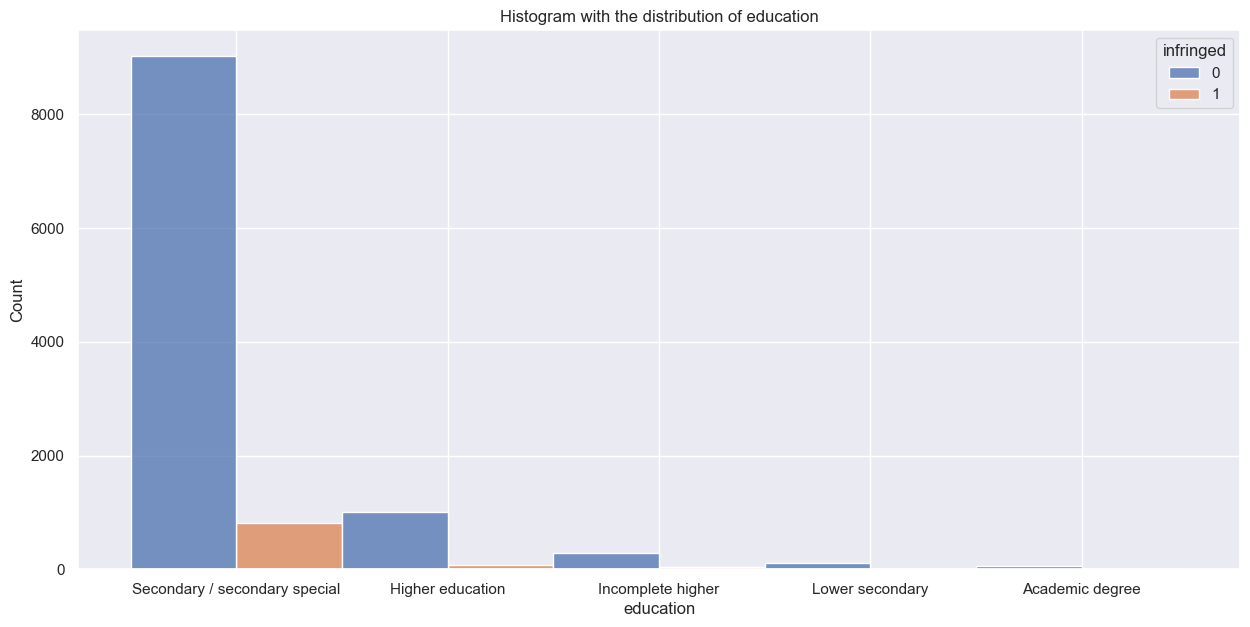

In [53]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='education', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of education')

Verifica-se que as percentagens mantêm-se mais ou menos identicas às do dataset original, apesar de se verificar que estitem em menor quatidade por apenas usarmos 1 décimo do dataset original.

Text(0.5, 1.0, 'Histogram with the distribution of the family status')

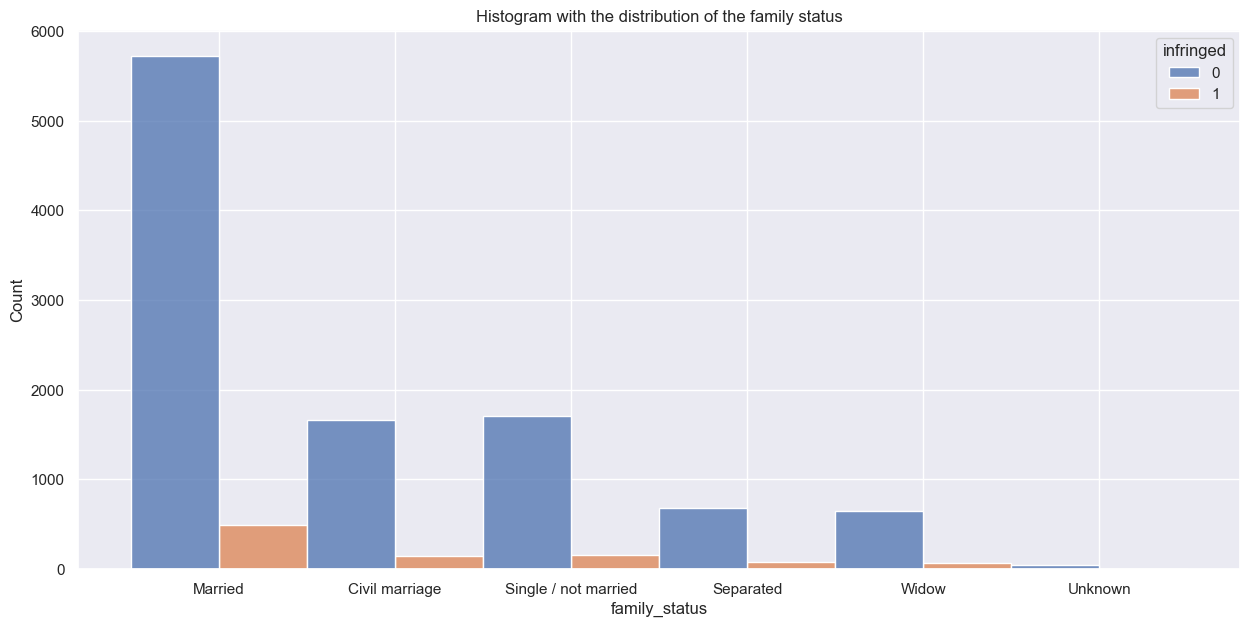

In [54]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='family_status', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of the family status')

Text(0.5, 1.0, 'Histogram with the distribution of the number of family members')

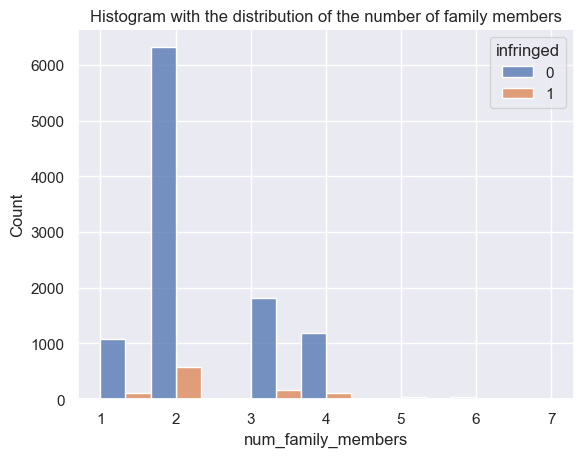

In [55]:
plt.figure()
sns.histplot(data=data, x='num_family_members', hue='infringed', multiple="dodge", bins=9)
plt.title('Histogram with the distribution of the number of family members')

Observa-se que ao utilizar apenas 10% do dataset original para treinar o modelo de geração de dados, se perderam muitas classes. Ou seja, neste dataset o máximo de filhos de uma pessoa apenas vai até 7, quando no original a gama era até 12. Como ter entre 7 e 12 membros na familia é raro, não foram cobertos pelos 10% do dataset.

Comparando os resultados obtidos utilizando o dataset gerado com o dataset original, é possível observar várias diferenças entre ambos. Neste dataset, existem muitas classes que foram eliminadas, uma vez que eram classe que aparecia poucas vezes no dataset original (outliers) e ao utilizar apenas 10% do dataset para treinar o modelo, desapareceram. Verifia-se ainda, que muitos padrões que existiam no dataset original se perderam, pelo que se considera ser necessário ter muito cuidado ao utilizar esta abordagem de geração de dados sintéticos para manter a privacidade dos dados originais. 